# Building a Handwriting Digits Classifier

This is a part of the Dataquest guided project. This project aims to build the model are able to classify handwriting digits. We will use the k-nearest neighbors model and also neural network with a single hidden layer and 2 hidden layers. Our goal is to examine which models provide us the higher range of accuracy scores and do not overfit the dataset.

In [123]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Working with Image Data

In [124]:
digit_data = load_digits()
digit_data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [125]:
# transform numpy arrays to Dataframe
data = pd.DataFrame(digit_data['data'])
target = pd.Series(digit_data['target'])

In [126]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


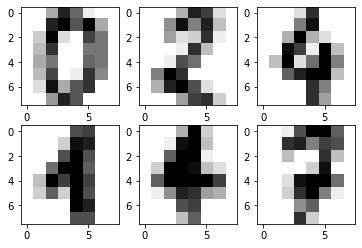

In [127]:
# visualize some of the images in the dataset
fig, axes = plt.subplots(2,3)
axes[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axes[0,1].imshow(data.iloc[50].values.reshape(8,8), cmap='gray_r')
axes[0,2].imshow(data.iloc[100].values.reshape(8,8), cmap='gray_r')

axes[1,0].imshow(data.iloc[200].values.reshape(8,8), cmap='gray_r')
axes[1,1].imshow(data.iloc[250].values.reshape(8,8), cmap='gray_r')
axes[1,2].imshow(data.iloc[300].values.reshape(8,8), cmap='gray_r')
plt.show()

## K-Nearest Neighbors Model

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train_knn(nneighbors, train_features, train_target):
    model = KNeighborsClassifier(n_neighbors=nneighbors)
    model.fit(train_features, train_target)
    return model

def test_knn(model, test_features, test_target):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_target, predictions)
    return accuracy

def cross_validate_knn(nneighbors, data, target):
    accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_knn(nneighbors, train_features, train_target)
        accuracy = test_knn(model, test_features, test_target)
        accuracies.append(accuracy)  
    return np.mean(accuracies)

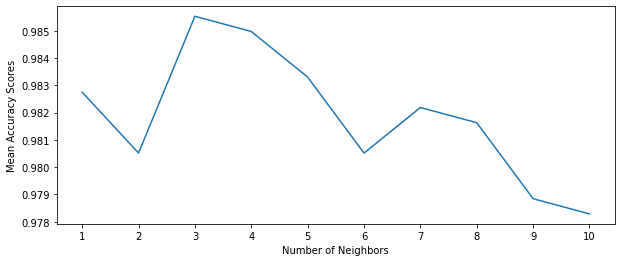

In [155]:
mean_accuracies = []

for k in range(1,11,1):
    mean_accuracies.append(cross_validate_knn(k, data, target))
    
plt.figure(figsize=(10,4))
plt.plot(np.arange(1,11), mean_accuracies)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy Scores')
plt.xticks(np.arange(1,11))
plt.show()

### Findings:

When the number of neighbors using in the k-nearest neighbors (knn) model is equal to 3, the accuracy score becomes the highest (~ 0.986). Overall, the mean accuracy scores of neighbor numbers in a range of 1 to 10 are above 0.97 or 97%. Although the knn model seems to work well, there are disadvantages using it, i.e. not being able to further explore since there is no model representation and using high memory.

## Neural Network with One Hidden Layer

In [167]:
from sklearn.neural_network import MLPClassifier

def train_nn(neurons, train_features, train_target):
    model = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=1000)
    model.fit(train_features, train_target)
    return model

def test_nn(model, test_features, test_target):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_target, predictions)
    return accuracy

def cross_validate_nn(n, data, target):
    accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_nn(n, train_features, train_target)
        accuracy = test_nn(model, test_features, test_target)
        accuracies.append(accuracy)  
    return np.mean(accuracies)

/Users/nammaneerath/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


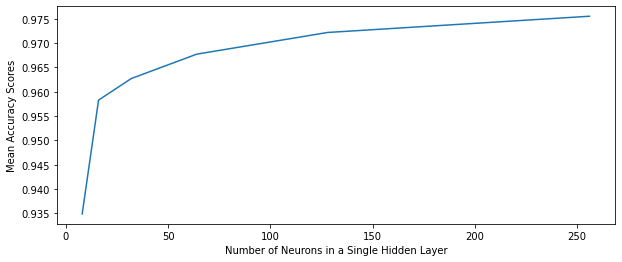

In [168]:
neurons = [2**x for x in range(3,9)]
nn_accuracies = []
for n in neurons:
    nn_accuracies.append(cross_validate_nn(n, data, target))

plt.figure(figsize=(10,4))
plt.plot(neurons, nn_accuracies)
plt.xlabel('Number of Neurons in a Single Hidden Layer')
plt.ylabel('Mean Accuracy Scores')
plt.show()

### Findings:

By increasing the number of neurons in a hidden layer, we found that the accuracy score significantly changes from ~0.935 (or 93.5%) to 0.975 (or 97.5%). 

Overall, the k-nearst neighbor model seems to be better to use since the accuracy overall is relatively high (> 97.8%). Thus, we do not need to use neural network with a single layer for this case.

## Is there any model starting to overfit?

In [178]:
def test_overfit(model, n, data, target):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        if model == 1:
            knn = train_knn(n, train_features, train_target)
            train_accuracy = test_knn(knn, train_features, train_target)
            train_accuracies.append(train_accuracy)
            test_accuracy = test_knn(knn, test_features, test_target)
            test_accuracies.append(test_accuracy)
        elif model == 2:
            nn = train_nn(n, train_features, train_target)
            train_accuracy = test_nn(nn, train_features, train_target)
            train_accuracies.append(train_accuracy)
            test_accuracy = test_nn(nn, test_features, test_target)
            test_accuracies.append(test_accuracy)
    return np.mean(train_accuracies), np.mean(test_accuracies)

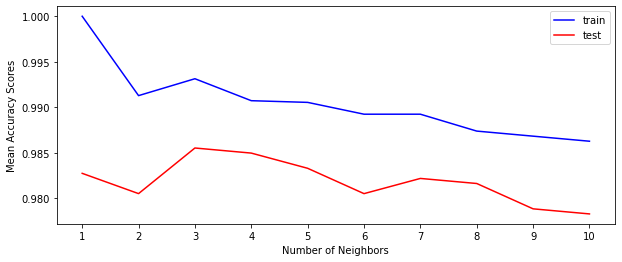

In [161]:
train_knn_accuracies = []
test_knn_accuracies = []
k = np.arange(1,11)

for ki in k:
    train_accuracy, test_accuracy = test_overfit(1, ki, data, target)
    train_knn_accuracies.append(train_accuracy)
    test_knn_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10,4))
plt.plot(k, train_knn_accuracies, color='blue', label='train')
plt.plot(k, test_knn_accuracies, color='red', label='test')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Accuracy Scores')
plt.xticks(np.arange(1,11))
plt.legend()
plt.show()

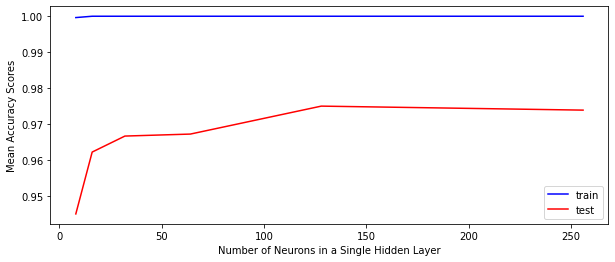

In [163]:
neurons = [2**x for x in range(3,9)]
train_nn_accuracies = []
test_nn_accuracies = []
for n in neurons:
    train_accuracy, test_accuracy = test_overfit(2, n, data, target)
    train_nn_accuracies.append(train_accuracy)
    test_nn_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10,4))
plt.plot(neurons, train_nn_accuracies, color='blue', label='train')
plt.plot(neurons, test_nn_accuracies, color='red', label='test')
plt.xlabel('Number of Neurons in a Single Hidden Layer')
plt.ylabel('Mean Accuracy Scores')
plt.legend()
plt.show()

### Findings:

For k-nearest neighbors model, the accuracy scores between train and test sets are very similar (< 1% difference). It is not likely that the model overfit the data. Similarly, for the neural network with a single hidden layer model, the difference between accuracy scores is lower than ~5%. This suggests that the model perform well on both train and test sets.  

## Neural Network with Two Hidden Layers

In [183]:
def train_nn2(neurons, train_features, train_target):
    model = MLPClassifier(hidden_layer_sizes=(neurons,neurons))
    model.fit(train_features, train_target)
    return model

def test_nn2(model, test_features, test_target):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(test_target, predictions)
    return accuracy

def cross_validate_nn2(n, data, target):
    accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train_nn2(n, train_features, train_target)
        accuracy = test_nn2(model, test_features, test_target)
        accuracies.append(accuracy)  
    return np.mean(accuracies)

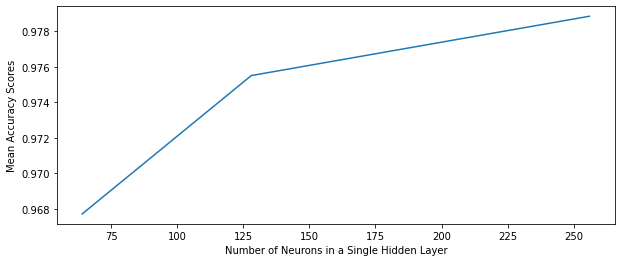

In [184]:
neurons = [2**x for x in range(6,9)]
nn2_accuracies = []
for n in neurons:
    nn2_accuracies.append(cross_validate_nn2(n, data, target))

plt.figure(figsize=(10,4))
plt.plot(neurons, nn2_accuracies)
plt.xlabel('Number of Neurons in a Single Hidden Layer')
plt.ylabel('Mean Accuracy Scores')
plt.show()

### Does the model start to overfit?

In [187]:
def test_overfit_nn2(n, data, target):
    train_accuracies = []
    test_accuracies = []
    kf = KFold(n_splits=4, shuffle=True, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

    nn2 = train_nn2(n, train_features, train_target)
    train_accuracy = test_nn2(nn2, train_features, train_target)
    train_accuracies.append(train_accuracy)
    test_accuracy = test_nn2(nn2, test_features, test_target)
    test_accuracies.append(test_accuracy)
    return np.mean(train_accuracies), np.mean(test_accuracies)

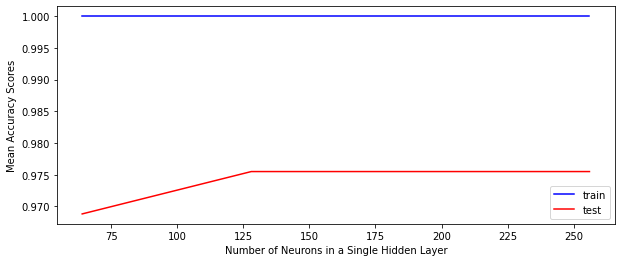

In [190]:
neurons = [2**x for x in range(6,9)]
train_nn2_accuracies = []
test_nn2_accuracies = []
for n in neurons:
    train_accuracy, test_accuracy = test_overfit_nn2(n, data, target)
    train_nn2_accuracies.append(train_accuracy)
    test_nn2_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10,4))
plt.plot(neurons, train_nn2_accuracies, color='blue', label='train')
plt.plot(neurons, test_nn2_accuracies, color='red', label='test')
plt.xlabel('Number of Neurons in a Single Hidden Layer')
plt.ylabel('Mean Accuracy Scores')
plt.legend()
plt.show()

### Findings:

The difference between accuracy scores between train and test sets is < 3.5% suggesting that it's unlikely that the model overfits the data. Overall, the accuracy is in the range of 97% - 98%, which is improved from the model of neural network with a single layer.

## Summary

- The neural network with 2 hidden layers seem to provide a higher range of the mean accuracy scores than the other two models (k-nearest neighbors and neural network with a single hidden layer). Increasing hidden layers likely increases a mean accuracy.
- All three models seem to not overfit the data since they perform well on both train and test sets. Note that the fold number used in KFold method is assigned to 4. For the future work, we can change this number and observe how the fold numbers affect the model performance.